In [32]:
# https://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/basic_gp.ipynb
import GPy
#GPy.plotting.change_plotting_library('plotly')
GPy.plotting.change_plotting_library('matplotlib')


- Use GP
- implement GP-UCB
- Run on simple benchmark function
- visualize
- Built NN with bayesian linear regressor (run on benchmark function)

- Writeup
    - BO approximations
    - 

In [46]:
import numpy as np

In [54]:
X = np.random.uniform(-3.,3.,(1,1))
Y = np.sin(X) + np.random.randn(1,1)*0.05

In [60]:
X.shape

(1, 1)

In [56]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

In [57]:
m = GPy.models.GPRegression(X,Y,kernel)

In [58]:
from IPython.display import display
display(m)

GP_regression.,value,constraints,priors
rbf.variance,1.0,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1.0,+ve,


/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/axes/_base.py:3124: UserWarning:

Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.04953269628589663, right=0.04953269628589663

/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



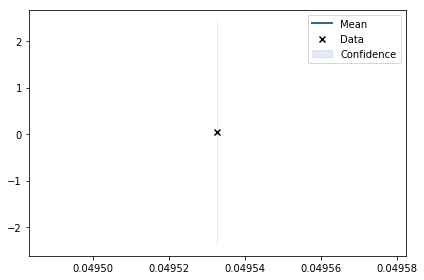

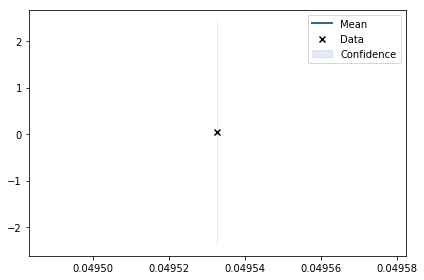

In [59]:
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook')

In [40]:
m.optimize(messages=True)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s01  0003  -7.489450e+00   2.243118e+01 
    00s03  0010  -1.079092e+01   3.213652e-01 
    00s06  0017  -1.090717e+01   5.979888e-12 
    00s06  0018  -1.090717e+01   5.979888e-12 
Runtime:     00s06
Optimization status: Converged



In [42]:
m.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = -10.907171007429115
Optimization restart 2/10, f = -10.907171007427223
Optimization restart 3/10, f = -10.90717100742383
Optimization restart 4/10, f = -10.907171007416977
Optimization restart 5/10, f = -10.907171007404067
Optimization restart 6/10, f = -10.907171007419727
Optimization restart 7/10, f = -10.907171007291586
Optimization restart 8/10, f = -10.907171007426129
Optimization restart 9/10, f = -10.9071710074118
Optimization restart 10/10, f = -10.907171007425333


GP_regression.,value,constraints,priors
rbf.variance,1.3872856613270048,+ve,
rbf.lengthscale,1.9712182091613755,+ve,
Gaussian_noise.variance,0.004118561168824776,+ve,


/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



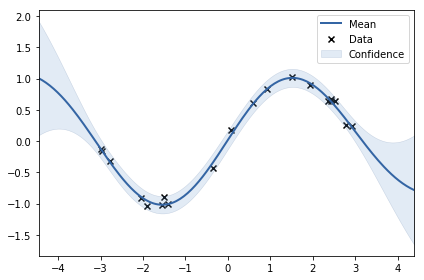

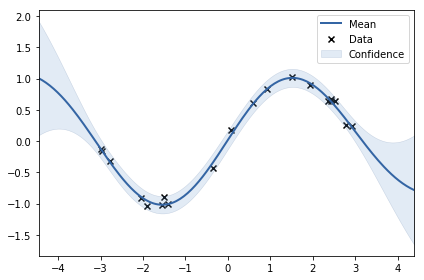

In [44]:
display(m)
fig = m.plot()
GPy.plotting.show(fig, filename='basic_gp_regression_notebook_optimized')


Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0001   7.228170e+01   8.315257e+01 
    00s02  0004   1.588472e+04   2.411906e+08 
    00s04  0008  -7.444070e+00   1.469658e+03 
    00s06  0012  -2.173360e+01   1.751990e+00 
    00s10  0020  -2.210271e+01   2.190874e-04 
    00s12  0025  -2.210278e+01   8.399598e-13 
Runtime:     00s12
Optimization status: Converged



/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning:

The following kwargs were not used by contour: 'label', 'linewidth'

/Users/tmpethick/anaconda3/envs/eth/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



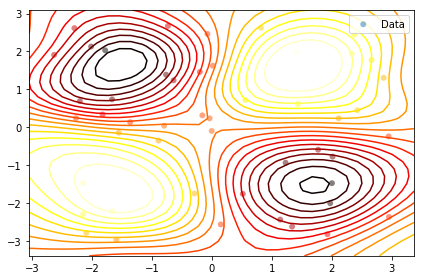

GP_regression.,value,constraints,priors
sum.Mat52.variance,0.35419184617332683,+ve,
sum.Mat52.lengthscale,"(2,)",+ve,
sum.white.variance,0.0004501283633580247,+ve,
Gaussian_noise.variance,0.0004501283633580247,+ve,


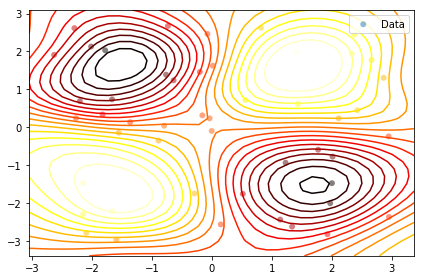

In [45]:
# sample inputs and outputs
X = np.random.uniform(-3.,3.,(50,2))
Y = np.sin(X[:,0:1]) * np.sin(X[:,1:2])+np.random.randn(50,1)*0.05

# define kernel
ker = GPy.kern.Matern52(2,ARD=True) + GPy.kern.White(2)

# create simple GP model
m = GPy.models.GPRegression(X,Y,ker)

# optimize and plot
m.optimize(messages=True,max_f_eval = 1000)
fig = m.plot()
display(GPy.plotting.show(fig, filename='basic_gp_regression_notebook_2d'))
display(m)